# MNIST Dynamic Filter Classification - Result

Note: This notebook is desinged to run with Python3 and GPU runtime.<br>

Modified for local (off-line) mode with Python 3.x, TensorFlow 1.x (or 2.x), with or without GPU<br>
2020/02/04: By H.Nishiyama<br>

This notebook rewrite for local (off-line) TensorFlow 1.x (or 2.x).<br>
*If you use on online-colaboratory system, remove "###" from the top of lines in code cells. <br>
Original notebook uses TensorFlow 2.x.

In [1]:
###%tensorflow_version 2.x

####[MDR-01]
Import modules.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

####[MDR-02]
Download the MNIST dataset and store into NumPy arrays.

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

####[MDR-03]
Modified to local (off-line) system.<br>
Original: Mount your Google Drive on `/content/gdrive`.<br>
Modified: Nothing.

In [4]:
###from google.colab import drive
###drive.mount('/content/gdrive')

####[MDR-04]
Modified to local (off-line) system.<br>
Original: Confirm that the exported model file `MNIST_single.hd5` is on your Google Drive.<br>
Modified: Nothing.


In [5]:
###!ls -l '/content/gdrive/My Drive/MNIST_single.hd5'

####[MDR-05]
Restore the model from the exported model file.<br>
Modified to local (off-line) system.<br>
*Waring will be occured for some version of TensorFlow as follows;<br>
WARNING:tensorflow:From ...

In [6]:
###model = models.load_model('/content/gdrive/My Drive/MNIST_single.hd5')
# For local (off-line) mode, using /tmp/ dir.
# If you use on online-colaboratory system, comment out the next line.
model = models.load_model('/tmp/MNIST_single.hd5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv_filter (Conv2D)         (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling (MaxPooling2D)   (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
hidden (Dense)               (None, 1024)              3212288   
_________________________________________________________________
softmax (Dense)              (None, 10)                10250     
Total params: 3,222,954
Trainable params: 3,222,954
Non-trainable params: 0
______________________________________________

####[MDR-06]
Define a model to extract outputs from intermediate layers.

In [7]:
layer_outputs = [model.get_layer('conv_filter').output,
                 model.get_layer('max_pooling').output]
model2 = models.Model(inputs=model.input, outputs=layer_outputs)

####[MDR-07]
Apply the trained filters to the MNIST dataset.

In [8]:
conv_output, pool_output = model2.predict(test_images[:9])
filter_vals = model.get_layer('conv_filter').get_weights()[0]

####[MDR-08]
Show images after applying the convolutional filters.

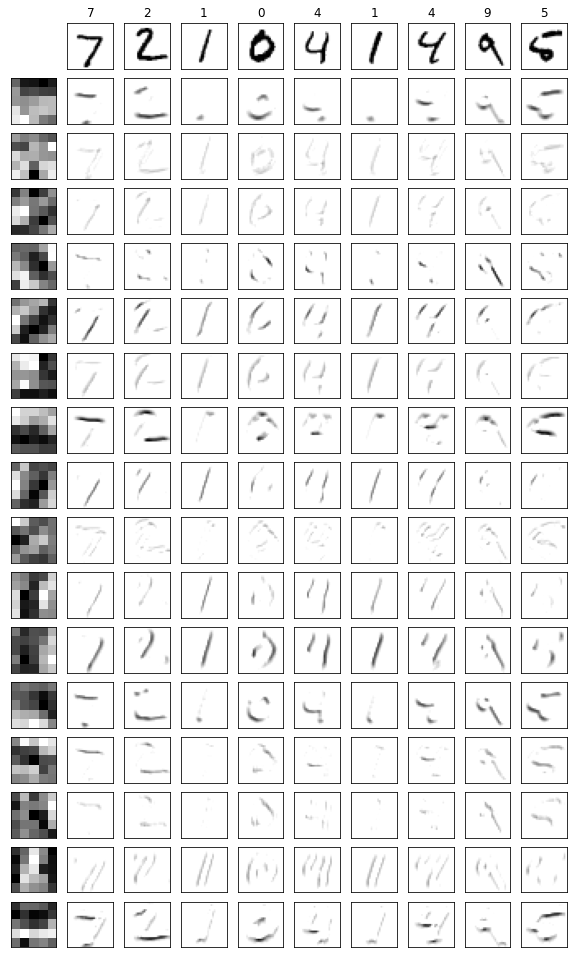

In [9]:
num_filters = 16
fig = plt.figure(figsize=(10, num_filters+1))
v_max = np.max(conv_output)

for i in range(num_filters):
    subplot = fig.add_subplot(num_filters+1, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i], cmap=plt.cm.gray_r)

for i in range(9):
    subplot = fig.add_subplot(num_filters+1, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(test_labels[i]))
    subplot.imshow(test_images[i].reshape((28,28)),
                   vmin=0, vmax=1, cmap=plt.cm.gray_r)

    for f in range(num_filters):
        subplot = fig.add_subplot(num_filters+1, 10, 10*(f+1)+i+2)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(conv_output[i,:,:,f], 
                       vmin=0, vmax=v_max, cmap=plt.cm.gray_r)

####[MDR-09]
Show images after applying the pooling layer.

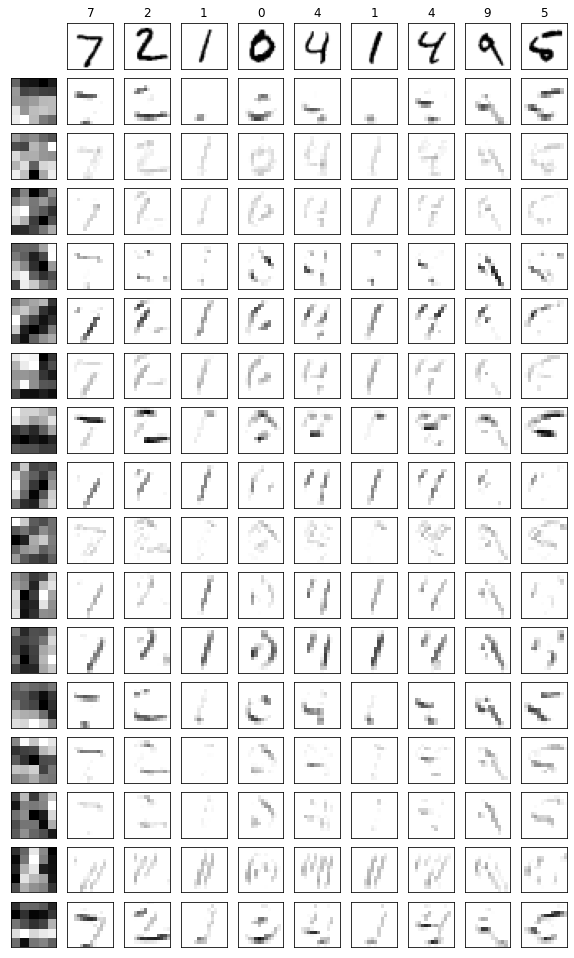

In [10]:
num_filters = 16
fig = plt.figure(figsize=(10, num_filters+1))
v_max = np.max(pool_output)

for i in range(num_filters):
    subplot = fig.add_subplot(num_filters+1, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i],
                   cmap=plt.cm.gray_r, interpolation='nearest')

for i in range(9):
    subplot = fig.add_subplot(num_filters+1, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(test_labels[i]))
    subplot.imshow(test_images[i].reshape((28,28)),
                   vmin=0, vmax=1, cmap=plt.cm.gray_r)

    for f in range(num_filters):
        subplot = fig.add_subplot(num_filters+1, 10, 10*(f+1)+i+2)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(pool_output[i,:,:,f], 
                       vmin=0, vmax=v_max, cmap=plt.cm.gray_r)

####[MDR-10]
Show prodiction results (probability for each digit) for incorrect predictions.

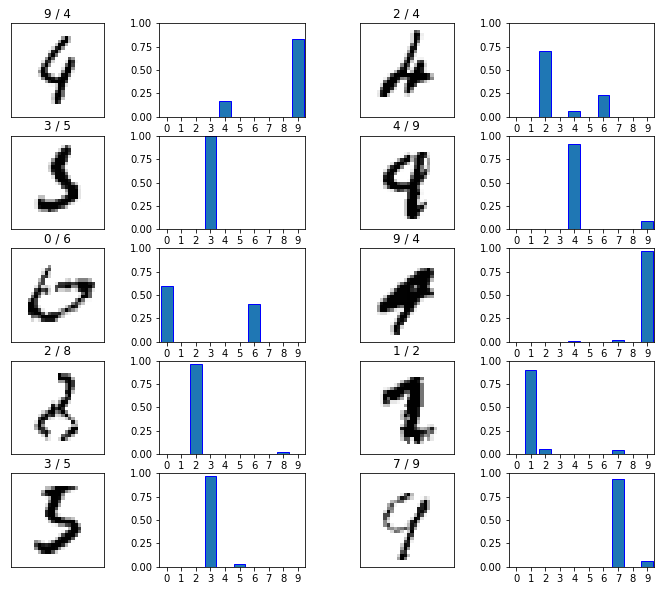

In [11]:
fig = plt.figure(figsize=(12, 10))
c = 0
for (image, label) in zip(test_images, test_labels):
    image
    p_val = model.predict(np.array([image]))
    pred = p_val[0]
    prediction, actual = np.argmax(pred), np.argmax(label)
    if prediction == actual:
        continue
    subplot = fig.add_subplot(5, 4, c*2+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d / %d' % (prediction, actual))
    subplot.imshow(image.reshape((28, 28)),
                   vmin=0, vmax=1, cmap=plt.cm.gray_r)
    subplot = fig.add_subplot(5, 4, c*2+2)
    subplot.set_xticks(range(10))
    subplot.set_xlim(-0.5, 9.5)
    subplot.set_ylim(0,1)
    subplot.bar(range(10), pred, align='center', edgecolor='b')
    c += 1
    if c == 10:
        break